# Master MIND - IDLE

# Descente de gradient et prise en main de PyTorch

------------------------------------------------------------------------

**Remarque:** Si vous arrivez ici sans avoir lu les instructions
d’installation sur la page du cours, ça ne va pas marcher. Goto
<https://schwander.isir.upmc.fr/enseignement/m1mind_idle/> dans ce cas.

# Exercice 1 - *Petits* *exemples* *PyTorch*

**<h1>ALAN TAMBELLINI 21203966</h1>**

In [1]:
import torch

## Question 1 - *Tenseurs* *avec* *et* *sans* *gradient*

In [2]:
a = 5.0
b = torch.tensor(a)
x  = torch.tensor(a, requires_grad=True)

-   Quelle est la différence entre les variables `a` et `b` et `x` ?

In [3]:
# a est un float python
# b est un tensor en 1 dimension
# x est un tensor ou les operations avec x lors de la computation du gradient sont "recorded", necessaire pour le backward

In [4]:
y = x**2

In [5]:
# pow x 2
y

tensor(25., grad_fn=<PowBackward0>)

-   Dessiner le graphe de calcul associé à `y`. Que constate-t-on en
    affichant la valeur de la variable ?

## Question 2 - *Calcul* *des* *gradients*

La passe backward est effectuée avec l’opération suivante:

In [6]:
y.backward()

In [7]:
y

tensor(25., grad_fn=<PowBackward0>)

On obtient le gradient par rapport à une variable de la façon suivante:

In [8]:
dy_dx = x.grad
dy_dx

tensor(10.)

## Question 3 - *Graphe* *plus* *complexe*

-   Dessiner le graphe de calcul associé aux instructions suivantes:

In [9]:
x = torch.tensor(5., requires_grad=True)
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
k = torch.tensor(2., requires_grad=True)
y = a * x + b
z = x**k
y

tensor(13., grad_fn=<AddBackward0>)

In [10]:
# z = pow x k
# y = plus (mult a x) b

-   Dériver `y` vérifier les valeurs des dérivées pour toutes les
    entrées du graphe.

-   Peut-on maintenant dériver `z` ? Expliquer ce qui se passe si on
    exécute le code suivant ?

In [11]:
y.backward()
x.grad

tensor(2.)

In [12]:
z.backward()
x.grad # FAUX 

tensor(12.)

**À RETENIR** On peut faire qu’une seule passe backward. Si on veut
calculer de nouveaux gradients, on doit réinitialiser le graphe de
calcul. Dans le contexte du deep learning, on dérive uniquement la loss
donc a priori ça n’est pas génant. Cependant, il faut faire attention
lors des itérations de la descente de gradient à bien réinitialiser les
valeurs des gradients.

# Exercice 2 - *Descente* *de* *gradient*

On va faire ici une implémentation manuelle de la descente de gradient.
L’objectif est de minimiser la fonction $f(w) = 0.25w^4 -
1.5w^3 - 1.25w^2 + 6*w$.

## Question 4 - *Implémentation*

-   Compléter la boucle d’optimisation suivante.

In [13]:
lr = 0.1
xl = []
yl = []
L = 100
x = torch.tensor(5., requires_grad=True)


for i in range(L):
    y = 0.25 * x**4 - 1.5 * x**3 - 1.25 * x**2 + 6*x
    y.backward()
    xl.append(x.item())
    yl.append(y.item())
    
    with torch.no_grad():
        x -= lr * x.grad
        #x.grad.zero_()
        #print(x.detach().numpy())
    #print(x, y)


## Question 5 - *Expériences*

-   Constatez expérimentalement l’influence des hyperparamètres vus en
    TD:
    -   learning rate
    -   initialisation

On veillera pour chaque expérience à tracer l’évolution de la fonction
objectif et à l’analyser.

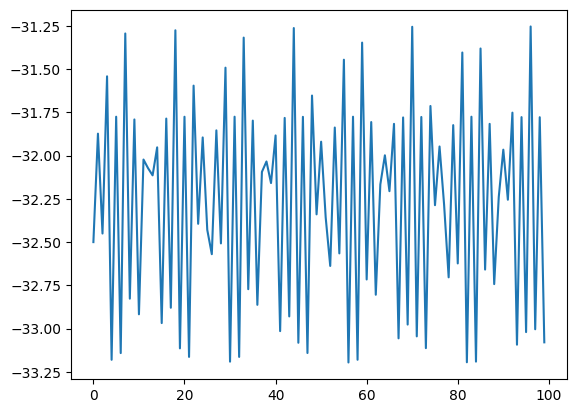

In [14]:
from matplotlib import pyplot as plt
import numpy as np
plt.plot(np.arange(L), yl) 
plt.show()

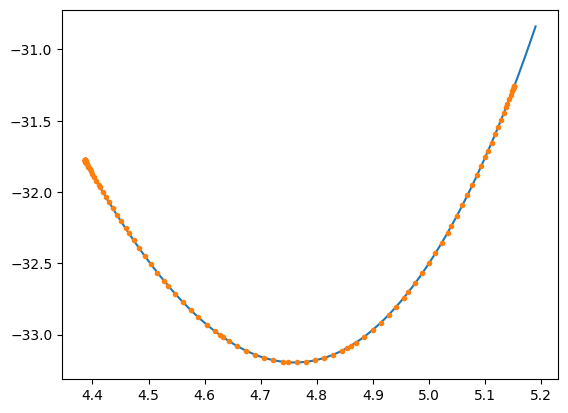

In [15]:
xf = np.arange(4.4,5.2,0.01)
yf = [0.25 * x**4 - 1.5 * x**3 - 1.25 * x**2 + 6*x for x in xf]
plt.plot(xf,yf)
plt.plot(xl,yl,'.')
plt.show()

-   Comment bien gérer le nombre d’itérations ?

# Exercice 3 - *Régression* *linaire*

## Question 6 - *Données* *toutes* *simples*

On va générer et afficher des données artificielles pour une tâche de
régression linéaire.

In [77]:
x = torch.arange(0, 10, 0.1, requires_grad=False)
y = 2 * x + 5 + torch.randn(100)
y

tensor([ 5.0964,  3.9902,  6.1327,  4.2045,  5.3392,  4.7541,  5.6037,  6.2581,
         6.2020,  5.6795,  7.1130,  6.5268,  8.7306,  9.0650,  8.1909,  8.9170,
         8.8741,  7.9178,  7.5411,  9.1548,  9.3947,  9.4550,  9.5709,  9.3501,
        11.2632,  9.2929, 10.3333,  9.4781, 10.7658, 11.2989, 10.1992, 10.8128,
        11.0301, 12.9291, 11.5809, 11.7579, 11.2768, 14.0103, 11.8823, 11.4790,
        12.3330, 12.7194, 13.2869, 13.5739, 14.8597, 14.6072, 13.1208, 14.7301,
        13.2111, 14.3022, 14.8901, 14.0626, 15.1251, 15.5005, 16.0368, 16.4597,
        15.1915, 15.5503, 18.8481, 16.5327, 16.2084, 17.4327, 17.4094, 16.1050,
        16.2433, 18.8815, 18.9520, 18.7468, 17.4358, 18.7978, 18.3493, 17.1803,
        18.5882, 20.9219, 19.2687, 20.3422, 20.6094, 19.8636, 19.7872, 19.5491,
        23.3577, 21.2421, 20.8762, 20.1104, 22.7242, 21.9070, 21.8940, 21.4245,
        22.4786, 23.5325, 23.7607, 23.1141, 22.3463, 23.3277, 24.5181, 21.3733,
        23.1944, 22.2057, 23.4417, 25.57

In [78]:
import matplotlib.pyplot as plt

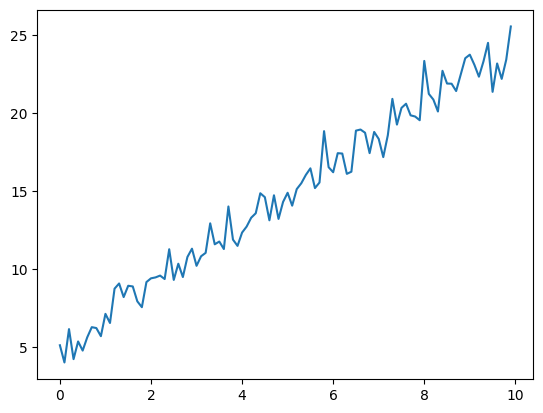

In [79]:
plt.plot(x, y)
plt.show()

## Question 7 - *Numpy* *et* *Pytorch*

Expliquer le `.detach()` dans la cellule précédente.

## Question 8 - *À* *la* *main*

Réalisez l’apprentissage en écrivant la boucle d’optimisation à la main.

In [80]:
# detach pour recuper la value seulement pas le grad, par contre dans ce cas on n'a pas besoin car le require grad est false

In [89]:
w = torch.tensor(1.0,requires_grad=True)
b = torch.tensor(0.0,requires_grad=True)
print(w,b)
lr = 0.001
L = []
n_iter = 1000

#la prediction sortie du model
def forward(x):
    return w * x + b


def MSE(yh,y):
    return torch.mean((yh - y)**2)


tensor(1., requires_grad=True) tensor(0., requires_grad=True)


In [90]:
for i in range(n_iter):
    yh = forward(x)
    loss = MSE(yh,y)
    L.append(loss.item())

    # compute gradient of loss to minimize it
    loss.backward()
    
    #updating params
    #w -= lr * w.grad.data
    w.data = w.data - lr * w.grad.data

    #w -= lr * w.grad
    b.data = b.data - lr * b.grad.data

    #b -= lr * b.grad

    #zero the grads to not add up
    w.grad.zero_()
    b.grad.zero_()
    print(i,loss.item(),w.item(),b.item())


0 103.77212524414062 1.1126885414123535 0.019509345293045044
1 91.13191223144531 1.2177836894989014 0.03786405548453331
2 80.13212585449219 1.3157955408096313 0.05514161288738251
3 70.5597915649414 1.4071998596191406 0.07141429930925369
4 62.229549407958984 1.4924405813217163 0.08674953877925873
5 54.980167388916016 1.5719317197799683 0.10121022164821625
6 48.6712760925293 1.646059513092041 0.11485502123832703
7 43.1807975769043 1.715184211730957 0.12773866951465607
8 38.4024543762207 1.7796419858932495 0.1399122178554535
9 34.24379348754883 1.8397462368011475 0.15142327547073364
10 30.624366760253906 1.8957895040512085 0.16231629252433777
11 27.47415542602539 1.9480445384979248 0.17263269424438477
12 24.732236862182617 1.9967658519744873 0.18241113424301147
13 22.345600128173828 2.0421907901763916 0.191687673330307
14 20.268129348754883 2.084540843963623 0.20049595832824707
15 18.459672927856445 2.1240227222442627 0.20886735618114471
16 16.88530158996582 2.1608288288116455 0.216831147

85 6.004295825958252 2.6486918926239014 0.45185527205467224
86 5.999064922332764 2.648637533187866 0.454138845205307
87 5.993852138519287 2.648564100265503 0.45641839504241943
88 5.988654136657715 2.648472785949707 0.45869413018226624
89 5.983470439910889 2.648365020751953 0.46096619963645935
90 5.978299140930176 2.6482417583465576 0.4632348120212555
91 5.973139762878418 2.648104190826416 0.4655000865459442
92 5.967992782592773 2.6479532718658447 0.46776220202445984
93 5.962855339050293 2.64778995513916 0.4700212776660919
94 5.957728385925293 2.6476149559020996 0.4722774624824524
95 5.95260763168335 2.6474289894104004 0.4745308756828308
96 5.947498321533203 2.647233009338379 0.47678160667419434
97 5.9423956871032715 2.6470274925231934 0.4790297746658325
98 5.937302112579346 2.64681339263916 0.4812754988670349
99 5.93221378326416 2.6465909481048584 0.4835188388824463
100 5.927133083343506 2.6463611125946045 0.4857598841190338
101 5.922060012817383 2.6461241245269775 0.48799872398376465


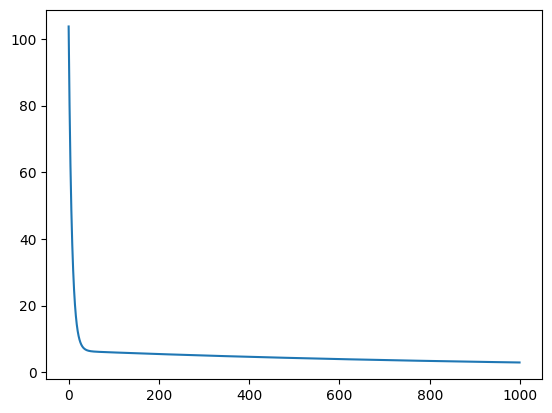

In [91]:
plt.plot(L)
plt.show()


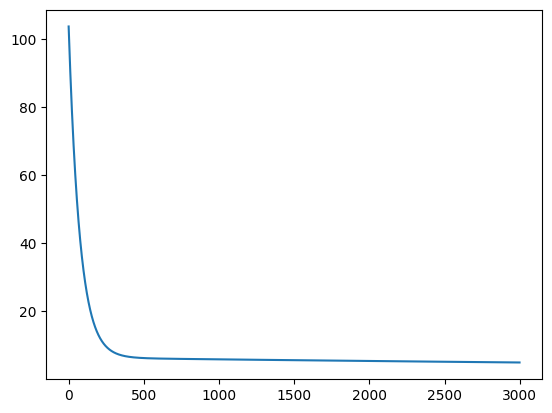

In [88]:
plt.plot(L)
plt.show()
#beaucoup trop iter

Pour le moment on s’intéresse uniquement à l’aspect technique de Torch,
on ne fera donc pas d’évaluation expérimentale. Néanmoins il est capital
de vérifier que l’optimisation se passe bien en traçant l’évolution de
la loss.

## Question 9 - *La* *vraie* *version* *pytorch*

Voici la vraie implémentation d’un module de régression linéaire:

In [97]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [98]:
model = linearRegression(1, 1)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
losses = []
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(x.reshape((-1, 1)))

    loss = criterion(outputs, y.reshape((-1, 1)))
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

    print(epoch, loss, model.linear.weight.data, model.linear.bias.data)

0 tensor(440.9121, grad_fn=<MseLossBackward0>) tensor([[1.6079]]) tensor([-0.5146])
1 tensor(54.6124, grad_fn=<MseLossBackward0>) tensor([[2.3865]]) tensor([-0.3694])
2 tensor(12.9233, grad_fn=<MseLossBackward0>) tensor([[2.6394]]) tensor([-0.3042])
3 tensor(8.3687, grad_fn=<MseLossBackward0>) tensor([[2.7198]]) tensor([-0.2653])
4 tensor(7.8161, grad_fn=<MseLossBackward0>) tensor([[2.7436]]) tensor([-0.2352])
5 tensor(7.6954, grad_fn=<MseLossBackward0>) tensor([[2.7487]]) tensor([-0.2080])
6 tensor(7.6219, grad_fn=<MseLossBackward0>) tensor([[2.7478]]) tensor([-0.1819])
7 tensor(7.5540, grad_fn=<MseLossBackward0>) tensor([[2.7449]]) tensor([-0.1562])
8 tensor(7.4873, grad_fn=<MseLossBackward0>) tensor([[2.7414]]) tensor([-0.1307])
9 tensor(7.4214, grad_fn=<MseLossBackward0>) tensor([[2.7376]]) tensor([-0.1054])
10 tensor(7.3561, grad_fn=<MseLossBackward0>) tensor([[2.7339]]) tensor([-0.0802])
11 tensor(7.2914, grad_fn=<MseLossBackward0>) tensor([[2.7301]]) tensor([-0.0552])
12 tensor(

-   Expliquez les différents éléments de cette boucle d’apprentissage.

-   Comparez le comportement d’un apprentissage avec votre
    implémentation avec avec les fonctions d’optimisation fournies par
    Pytorch.

-   Tracez et analysez les courbes de loss.

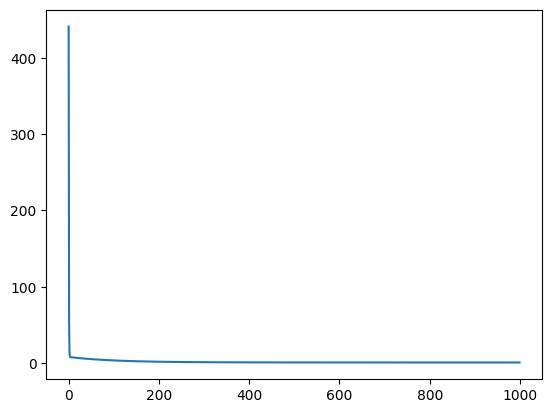

In [99]:
plt.plot(losses)
plt.show()